<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



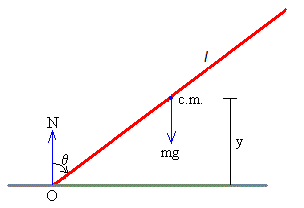


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [1]:
#item 1

# Importando las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, quad

# Definición de parámetros del sistema
LONGITUD_LAPIZ = 0.1  # Longitud del lápiz en metros
GRAVEDAD = 9.8        # Aceleración debido a la gravedad en m/s²
ANGULO_INICIAL = np.pi / 12  # Ángulo inicial en radianes
VELOCIDAD_ANGULAR_INICIAL = 0  # Velocidad angular inicial en rad/s

# Definimos el sistema de ecuaciones diferenciales
def sistema_ecuaciones(y, t, l, g):
    theta, omega = y
    d2theta_dt2 = ( (2 * g / l - omega ** 2 * np.cos(theta)) / (1/3 + np.sin(theta)**2) ) * np.sin(theta)
    return [omega, d2theta_dt2]

# Definimos las condiciones iniciales
condiciones_iniciales = [ANGULO_INICIAL, VELOCIDAD_ANGULAR_INICIAL]
tiempo = np.linspace(0, 5, 500)  # Vector de tiempo de 0 a 5 segundos

# Resolviendo la ecuación diferencial usando odeint
solucion = odeint(sistema_ecuaciones, condiciones_iniciales, tiempo, args=(LONGITUD_LAPIZ, GRAVEDAD))

# Extraemos theta y omega de la solución
theta = solucion[:, 0]
omega = solucion[:, 1]

# Calculamos la posición del centro de masa
posicion_cm = LONGITUD_LAPIZ / 2 * np.cos(theta)

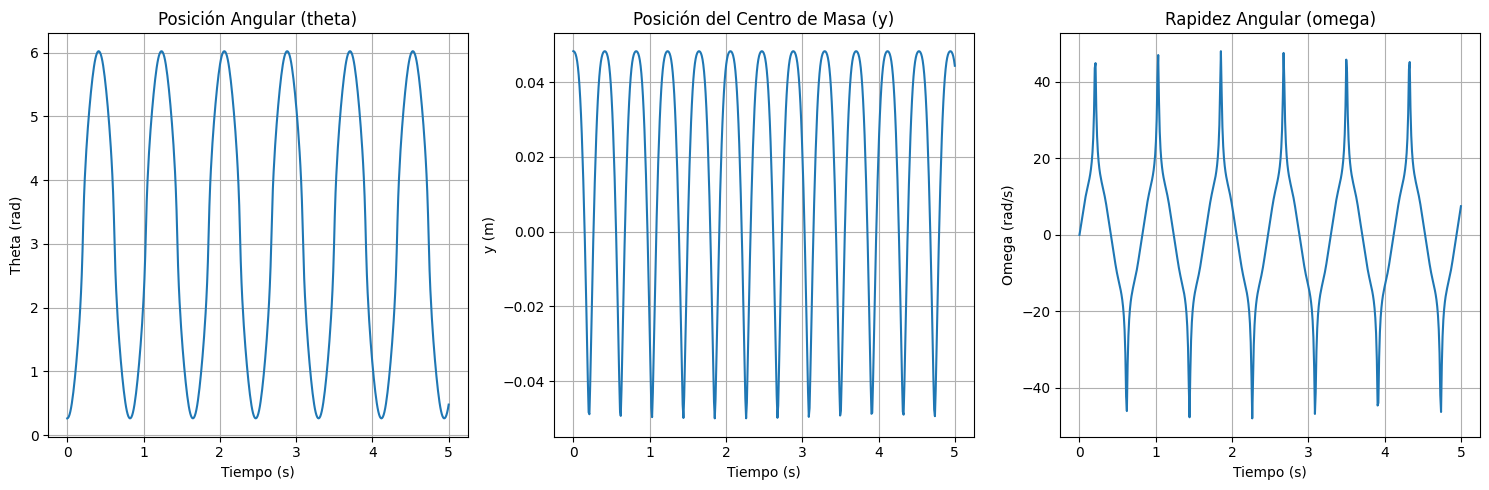

In [2]:
#Item 2

# Graficamos los resultados
plt.figure(figsize=(15, 5))

# Gráfico de la posición angular (theta)
plt.subplot(1, 3, 1)
plt.plot(tiempo, theta)
plt.title('Posición Angular (theta)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.grid()

# Gráfico de la posición del centro de masa (y)
plt.subplot(1, 3, 2)
plt.plot(tiempo, posicion_cm)
plt.title('Posición del Centro de Masa (y)')
plt.xlabel('Tiempo (s)')
plt.ylabel('y (m)')
plt.grid()

# Gráfico de la rapidez angular (omega)
plt.subplot(1, 3, 3)
plt.plot(tiempo, omega)
plt.title('Rapidez Angular (omega)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Omega (rad/s)')
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
#item 3

# Análisis del tiempo en el que el lápiz llega al suelo
tiempo_caida = tiempo[np.where(theta >= np.pi / 2)[0][0]]
print(f"Tiempo para caer: {tiempo_caida:.2f} s")

Tiempo para caer: 0.15 s


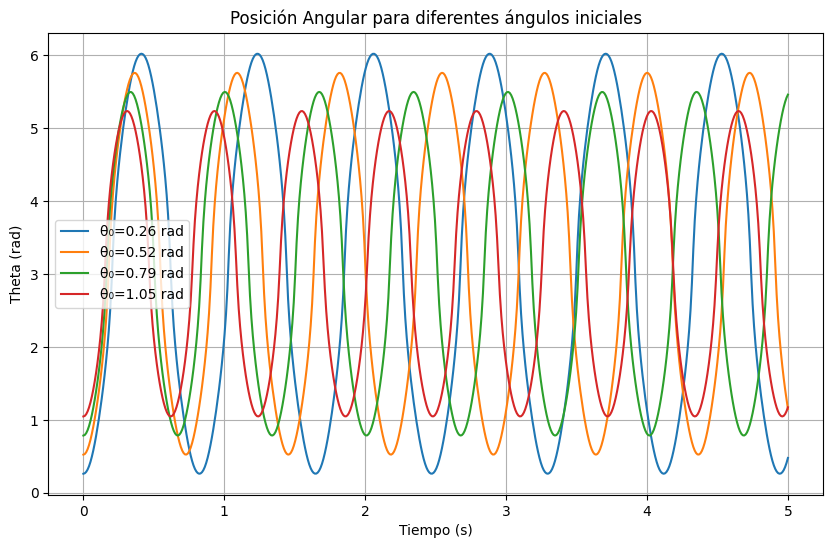

[0.1503006012024048, 0.13026052104208416, 0.11022044088176353, 0.09018036072144288]


In [4]:
#items 4 y 5

# Repetimos el proceso para diferentes ángulos iniciales
angulos_iniciales = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]
tiempos_caida_angulos = []

plt.figure(figsize=(10, 6))

for angulo in angulos_iniciales:
    # Resolviendo ODE para cada ángulo inicial
    condiciones_iniciales = [angulo, VELOCIDAD_ANGULAR_INICIAL]
    solucion = odeint(sistema_ecuaciones, condiciones_iniciales, tiempo, args=(LONGITUD_LAPIZ, GRAVEDAD))
    theta = solucion[:, 0]

    # Guardamos el tiempo en que el lápiz cae
    tiempo_fall = tiempo[np.where(theta >= np.pi/2)[0][0]]
    tiempos_caida_angulos.append(tiempo_fall)

    # Graficar theta para cada ángulo
    plt.plot(tiempo, theta, label=f'θ₀={angulo:.2f} rad')

plt.title('Posición Angular para diferentes ángulos iniciales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.legend()
plt.grid()
plt.show()

print(tiempos_caida_angulos)

In [5]:
#Item 6

# Implementamos la integral para calcular el tiempo de caída
def integral_tiempo_caida(theta_0):
    resultado_integral, _ = quad(lambda theta: np.sqrt((1/3 + np.sin(theta)**2) / (np.cos(theta_0) - np.cos(theta))), theta_0, np.pi/2)
    return 0.5 * np.sqrt(LONGITUD_LAPIZ/GRAVEDAD) * resultado_integral

# Calculamos T para cada ángulo inicial
valores_T = [integral_tiempo_caida(angulo) for angulo in angulos_iniciales]
print("Valores de T para los ángulos:", valores_T)

Valores de T para los ángulos: [0.1479832354352146, 0.12177877486183575, 0.10332124464085383, 0.08416005040767828]


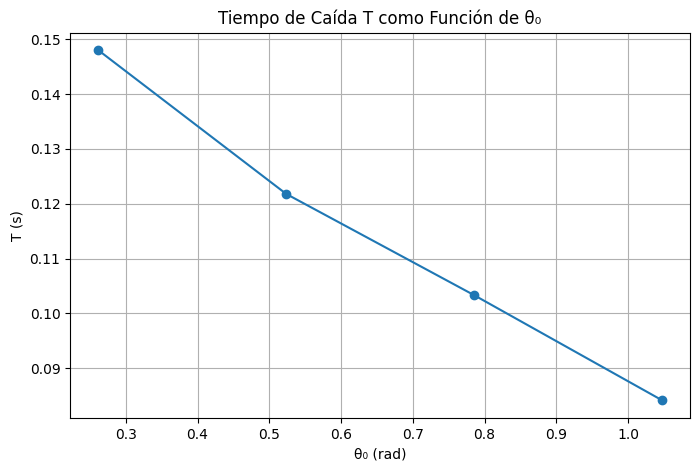

In [6]:
# Graficamos T como función de θ₀
plt.figure(figsize=(8, 5))
plt.plot(angulos_iniciales, valores_T, marker='o')
plt.title('Tiempo de Caída T como Función de θ₀')
plt.xlabel('θ₀ (rad)')
plt.ylabel('T (s)')
plt.grid()
plt.show()

Conclusiones:
Observando el gráfico de (T) como función de theta_0, se puede concluir cómo influyen los ángulos iniciales en el tiempo de caída. Esto muestra que hay una relación inversa y cómo aumenta el tiempo de caída conforme decrece el ángulo.